# Importing Data and Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('GejalaPenyakit.csv')

In [3]:
df

,Nama,Batuk,muntah,Beringus,Pusing,Penyakit
0,Duncan Poley,1,0,1,1,Demam Berdarah
1,Sonnie Martyn,0,1,0,0,Muntaber
2,Auroora Conerding,1,0,1,1,Demam Berdarah
3,Aretha O' Cuolahan,1,0,1,1,Demam Berdarah
4,Barrie Douglass,1,1,0,1,Demam Berdarah
5,Sascha Bernadon,1,1,1,1,Demam Berdarah
6,Erica Swinney,0,1,1,0,Muntaber
7,Aland Julyan,1,1,0,0,Muntaber
8,Caitrin Kerfod,1,0,0,1,Influenza
9,Wake Isson,0,0,1,1,Influenza


# Preprosessing

In [4]:
# convert label to a numerical variable
df['Penyakit_num'] = df.Penyakit.map({'Demam Berdarah':'1001', 'Influenza':'0111','Muntaber':'1011'})
df

,Nama,Batuk,muntah,Beringus,Pusing,Penyakit,Penyakit_num
0,Duncan Poley,1,0,1,1,Demam Berdarah,1001
1,Sonnie Martyn,0,1,0,0,Muntaber,1011
2,Auroora Conerding,1,0,1,1,Demam Berdarah,1001
3,Aretha O' Cuolahan,1,0,1,1,Demam Berdarah,1001
4,Barrie Douglass,1,1,0,1,Demam Berdarah,1001
5,Sascha Bernadon,1,1,1,1,Demam Berdarah,1001
6,Erica Swinney,0,1,1,0,Muntaber,1011
7,Aland Julyan,1,1,0,0,Muntaber,1011
8,Caitrin Kerfod,1,0,0,1,Influenza,0111
9,Wake Isson,0,0,1,1,Influenza,0111


In [5]:
#split dataset in features and target variable
feature_cols = ['Batuk', 'muntah', 'Beringus', 'Pusing']
X = df[feature_cols] # Features
y = df.Penyakit # Target variable

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% tes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21, 4), (9, 4), (21,), (9,))

# Build Model

In [7]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [8]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy\t\t:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score\t\t:",metrics.f1_score(y_test, y_pred, average=None))
print("Precision\t\t:",metrics.precision_score(y_test, y_pred, average=None))
print("Recall\t\t\t:",metrics.recall_score(y_test, y_pred, average=None))
print("Confusion Matrix\t:\n",metrics.confusion_matrix(y_test, y_pred, labels=['Demam Berdarah', 'Influenza','Muntaber']))

Accuracy		: 1.0
F1 Score		: [1. 1. 1.]
Precision		: [1. 1. 1.]
Recall			: [1. 1. 1.]
Confusion Matrix	:
 [[4 0 0]
 [0 3 0]
 [0 0 2]]


In [9]:
clf.predict([[1,0,0,1]])

array(['Influenza'], dtype=object)

# Vizualize Model Result

In [10]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

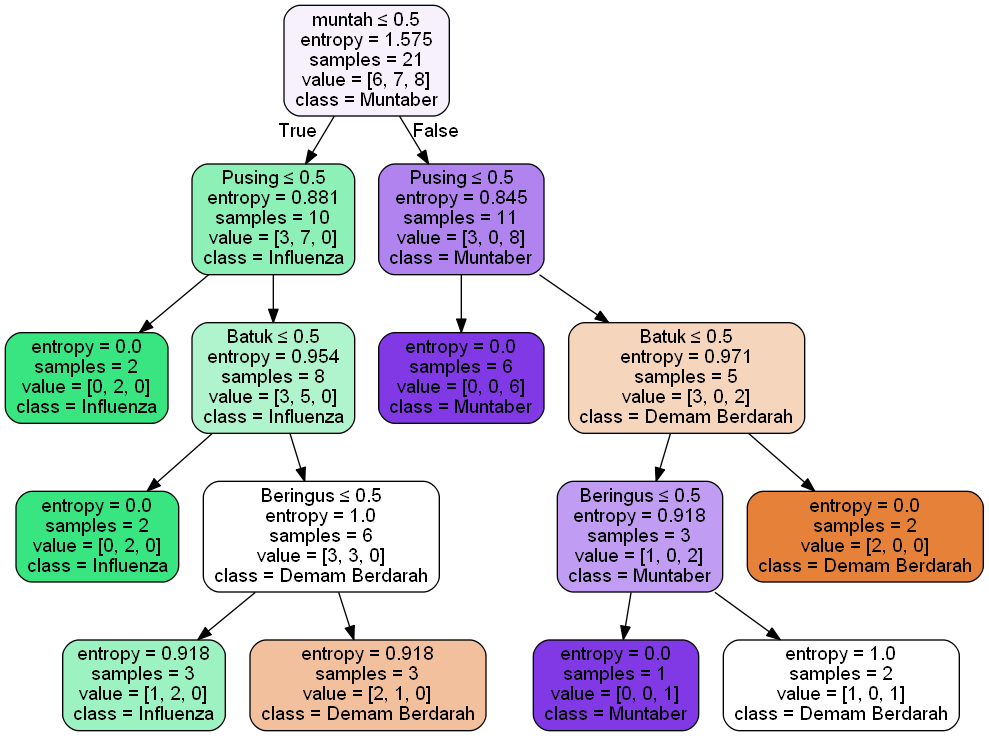

In [11]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Demam Berdarah', 'Influenza','Muntaber'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('penyakit.png')
Image(graph.create_png())